# Class Imbalance Solutions <a class="tocSkip">

In [1]:
from importlib import reload

import functions as fn
import libraries
from libraries import *
import visuals as vs
from visuals import *
import model_resampling_pipeline as rsp


reload(libraries)
reload(fn)
reload(vs)
reload(rsp)
%matplotlib inline



In [2]:
first = pd.read_csv('first.csv', index_col=0)

first.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,y,season,day_binned
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,0,spring,1
1,44,technician,single,secondary,no,29,yes,no,unknown,1,0,spring,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,0,spring,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,0,spring,1
4,33,unknown,single,unknown,no,1,no,no,unknown,1,0,spring,1


In [3]:
first.day_binned = first.day_binned.astype('object')

# Onehot encode categorical data
onehot = fn.one_hot_df(first, target='y')

# Standardize 
onehot_z = onehot.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=0)

onehot_z['y'] = first.y
onehot['y'] = first.y

# Load Data

First contact subset of data loaded. 

In [4]:
onehot.columns

Index(['age', 'balance', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'day_binned_1', 'day_binned_2',
       'day_binned_3', 'y'],
      dtype='object')

#### Train Test Split

In [5]:
y = first.y

# Created from scaled data set
dtrain_scaled, dtest_scaled = train_test_split(onehot_z, stratify = y, 
                                               test_size=0.2, random_state=0)

# Created from one hot encoded, unscaled data set
dtrain, dtest = train_test_split(onehot, stratify = y, test_size=0.2, random_state=0)

features = dtrain.columns[:-1]

X_scaled = dtrain_scaled.drop('y', axis=1, inplace=False)
X = dtrain.drop('y', axis=1, inplace=False)
y = dtrain.y

#### Train Valid Split

In [6]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pipeline for various re-sampling methods


In [7]:
# Fill summary table with best models and sampling methods
summary = pd.DataFrame(columns=['sampling', 'model', 'recall', 'precision', 'tnr', 'auc', 'f1'])

## Decision Tree

In [8]:
model = DecisionTreeClassifier()
results = rsp.model_resampling_pipeline(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, model)

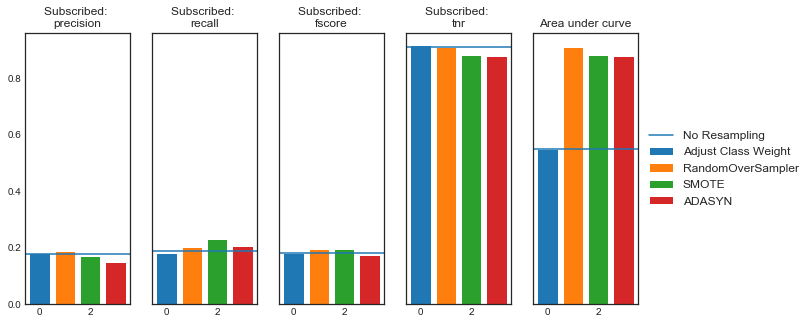

In [9]:
rsp.evaluate_method(results, 'oversample')

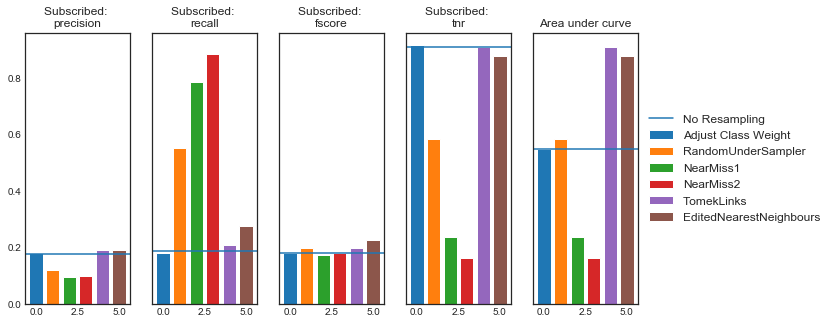

In [10]:
rsp.evaluate_method(results, 'undersample')

In [11]:
rsp.add_results(summary,'Decision Tree', results, 'undersample', 'RandomUnderSampler')

In [12]:
summary

,sampling,model,recall,precision,tnr,auc,f1
0,RandomUnderSampler,Decision Tree,0.550802,0.121845,0.583894,0.567348,0.199548


## Random Forest

In [13]:
model = RandomForestClassifier(n_estimators=100)
results = rsp.model_resampling_pipeline(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, model)

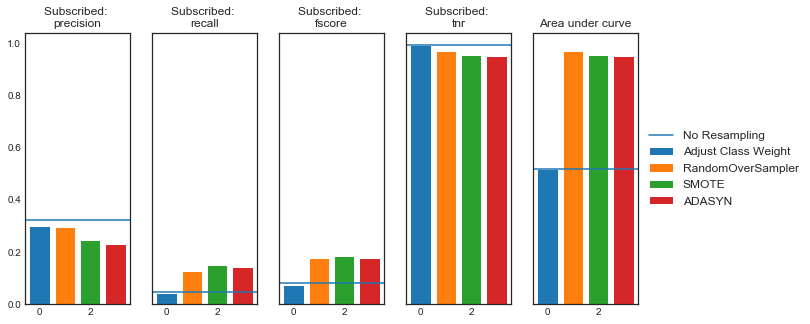

In [14]:
rsp.evaluate_method(results, 'oversample')

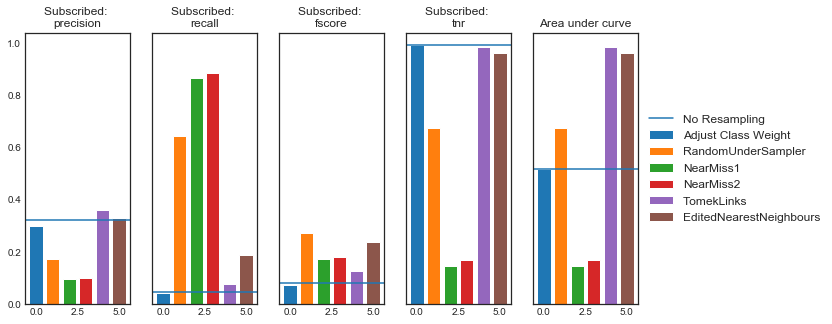

In [15]:
rsp.evaluate_method(results, 'undersample')

In [16]:
rsp.add_results(summary,'Random Forest', results, 'undersample', 'RandomUnderSampler')

## Logistic regression

In [17]:
model = LogisticRegression(fit_intercept = False, solver='lbfgs',
                           C = 0.7)
results = rsp.model_resampling_pipeline(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, model)

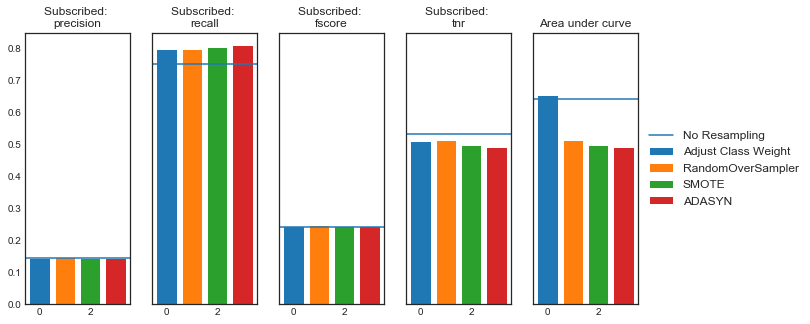

In [18]:
rsp.evaluate_method(results, 'oversample')

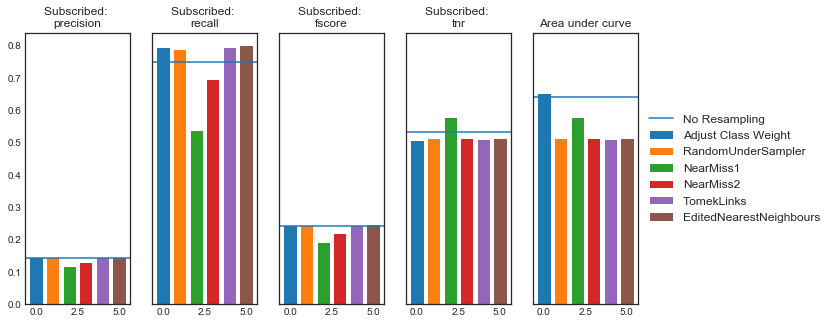

In [19]:
rsp.evaluate_method(results, 'undersample')

In [20]:
rsp.add_results(summary,'Logistic Regression', results, 'class_weight')

## SVM Classifier

In [21]:
model = SVC()
results = rsp.model_resampling_pipeline(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, model)

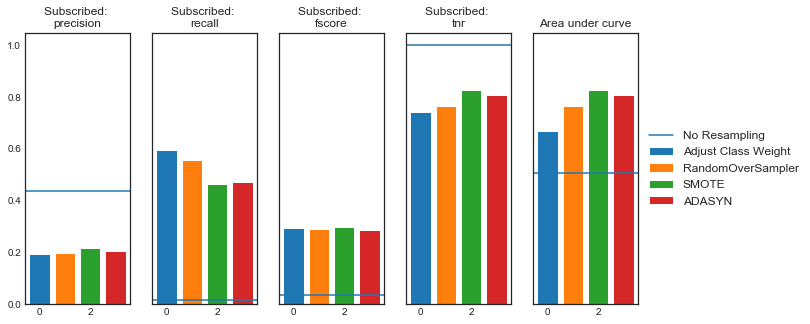

In [22]:
rsp.evaluate_method(results, 'oversample')

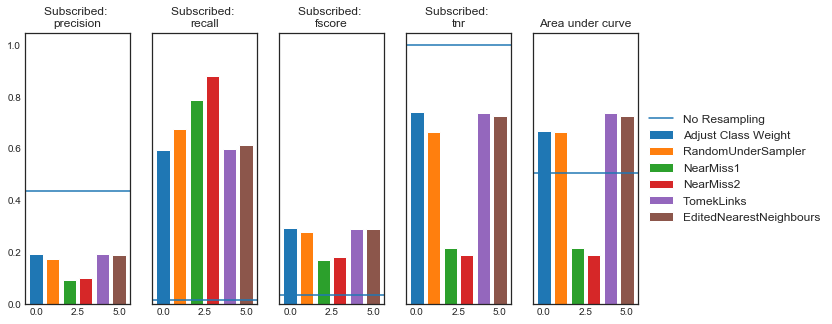

In [23]:
rsp.evaluate_method(results, 'undersample')

In [24]:
rsp.add_results(summary,'SVM', results, 'undersample', 'RandomUnderSampler')

## KNN

In [25]:
model = KNeighborsClassifier()
results = rsp.model_resampling_pipeline(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, model)

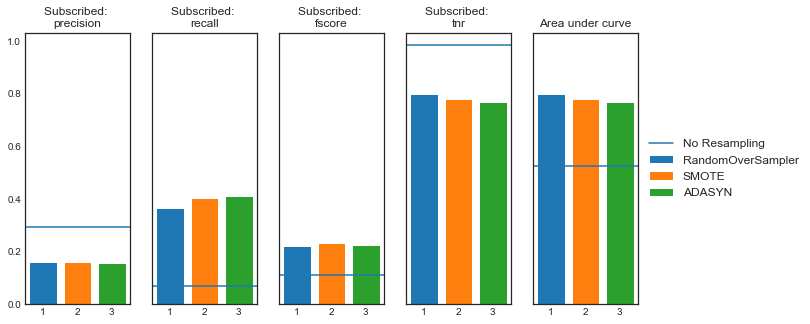

In [26]:
rsp.evaluate_method(results, 'oversample')

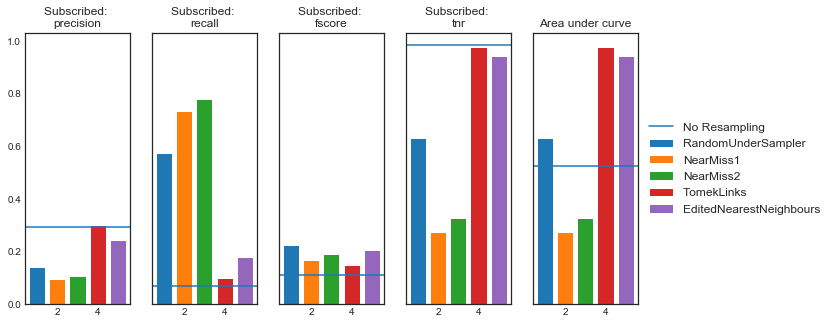

In [27]:
rsp.evaluate_method(results, 'undersample')

In [28]:
rsp.add_results(summary,'KNN', results, 'undersample', 'NearMiss2')

## AdaBoost Classifier

In [29]:
model = AdaBoostClassifier()
results = rsp.model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

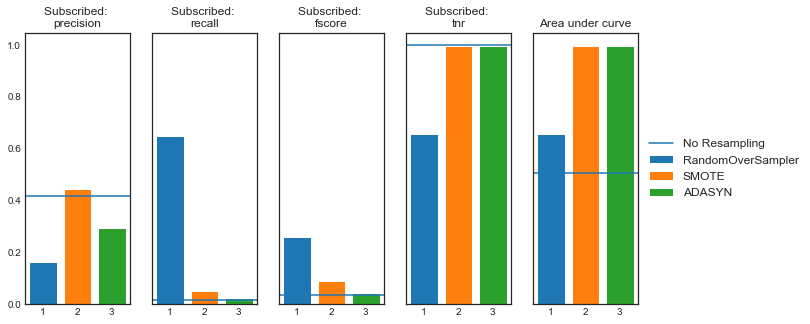

In [30]:
rsp.evaluate_method(results, 'oversample')

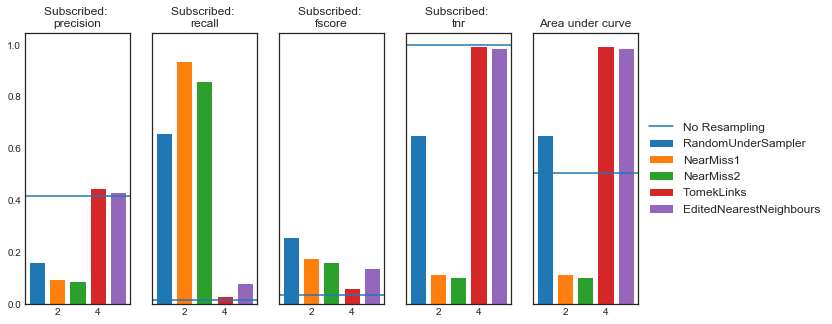

In [31]:
rsp.evaluate_method(results, 'undersample')

In [32]:
rsp.add_results(summary,'AdaBoost', results, 'oversample', 'RandomOverSampler')

## XGBoost Classifier

In [33]:
model = xgb.XGBClassifier()
results = rsp.model_resampling_pipeline(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, model)
xgb_results = results

In [34]:
# Add weighted model

model = xgb.XGBClassifier(scale_pos_weight=11)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions, 
                                                                                     pos_label=1,
                                                                                     average='binary')
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
auc = metrics.auc(fpr, tpr)
tnr = tn / (tn + fp)
tpr_score = tp / (tn + tp)
gmean = (tnr * recall)**0.5
weighted_accuracy = (0.5*recall) + ((1 - 0.5)*tnr)
    
xgb_results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                            'fscore': fscore, 'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc,
                                            'tnr': tnr, 'gmean': gmean,
                                            'weighted_accuracy': weighted_accuracy}

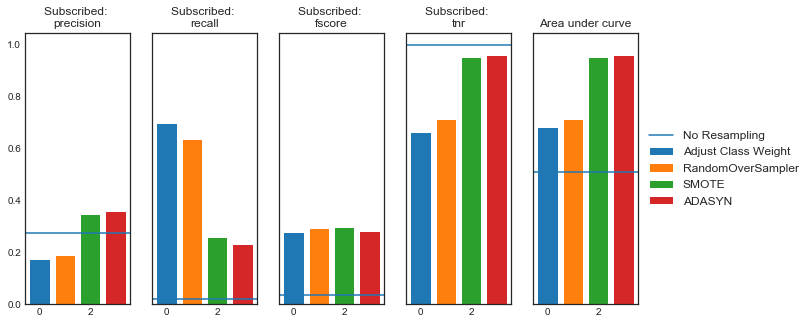

In [35]:
# Adjusted class weight run on unscaled dataset
# Scaled data used for other sampling methods
rsp.evaluate_method(xgb_results, 'oversample')

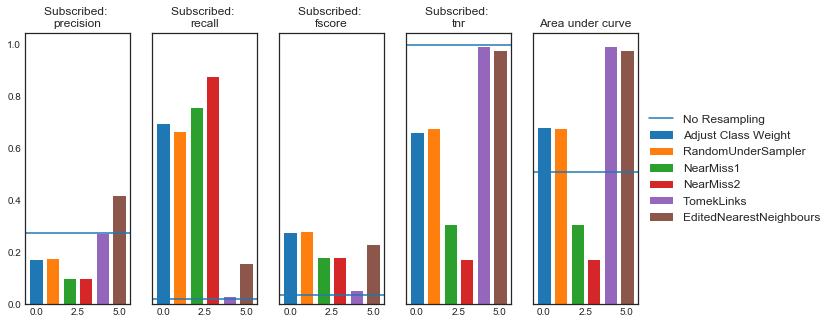

In [36]:
rsp.evaluate_method(results, 'undersample')

In [37]:
rsp.add_results(summary,'XGB', results, 'class_weight')

## Semi-Naive Model Summary

In [38]:
summary

,sampling,model,recall,precision,tnr,auc,f1
0,RandomUnderSampler,Decision Tree,0.550802,0.121845,0.583894,0.567348,0.199548
1,RandomUnderSampler,Random Forest,0.645276,0.171320,0.672833,0.659054,0.270755
2,class_weight,Logistic Regression,0.796791,0.145460,0.509342,0.653067,0.246010
3,RandomUnderSampler,SVM,0.673797,0.174274,0.665359,0.669578,0.276923
4,NearMiss2,KNN,0.778966,0.108518,0.329223,0.554094,0.190497
5,RandomOverSampler,AdaBoost,0.649635,0.161451,0.655359,0.652497,0.258627
6,class_weight,XGB,0.697080,0.174111,0.662255,0.679668,0.278629


XGBoost appears to have the best balance between true positive rate (recall) and true negative rate, while the Logistic Regression had the best recall rate and still maintained a 50% true negative rate. In both cases the models were weighted for the class imbalance (rather than resampled). Both will be further explored.  

# Tuning XGBoost

In [39]:
# dtrain is the onehot encoded, unscaled training set that includes the target variable
# From this, the function will create a train and validation set
# The validation set can be used for tuning
# Final model will be run on the test set


In [40]:
def modelfit(clf, dtrain, features, target='y', useTrainCV=True, 
             cv_folds=5, early_stopping_rounds=50, feat_imp=False,
             smote=False):
    
    # Split data into training and validation sets
    X_train, X_valid = train_test_split(dtrain, stratify=y, test_size=0.1, random_state=0)
    print('Length train:', len(X_train.index))
    print('Length valid:', len(X_valid.index), end='\n\n')
    
    y_valid = X_valid[target]
    y_train = X_train[target]    
    X_train = X_train[features]
    X_valid = X_valid[features]

    
    if smote:
        X_train_res, y_train_res = SMOTE(random_state=10, 
                                         sampling_strategy=0.5).fit_sample(X_train, y_train) 

        X_train = pd.DataFrame(X_train_res)
        X_train.columns = features
        y_train = y_train_res
        #y_train.columns = ['y']
    
    xgtrain = xgb.DMatrix(X_train, y_train, missing=-99)
    xgvalid = xgb.DMatrix(X_valid, y_valid, missing =-99)

    if useTrainCV:
        print('Starting cv:')
        print('--------------------------------------------------------------------')
        xgb_param = clf.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[features].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=clf.get_params()['n_estimators'], 
                          nfold=cv_folds, metrics='auc', 
                          early_stopping_rounds = early_stopping_rounds,
                          verbose_eval=20)
        clf.set_params(n_estimators=cvresult.shape[0])
        print('n_estimators:', cvresult.shape[0])
    
    # Fit the algorithm on the data
    print(' ')
    print('Fitting Classifier:')
    print('--------------------------------------------------------------------')
    watchlist = [(xgtrain, 'train'), (xgvalid, 'eval')]
    clf.fit(X_train[features], y_train, eval_metric='auc', 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=False)
        
    # Predict training set:
    train_predictions = clf.predict(X_train)
    train_predprob = clf.predict_proba(X_train)[:,1]
    
    # Predict validation set
    valid_predictions = clf.predict(X_valid)
    valid_predprob = clf.predict_proba(X_valid)[:,1]
 
        
    # Print model report:
    print("\nModel Report")
    print("Precision (Train) : %.4g" % metrics.precision_score(y_train, train_predictions))
    print("Precision (Valid) : %.4g" % metrics.precision_score(y_valid, valid_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, train_predprob))
    print("AUC Score (Valid): %f" % metrics.roc_auc_score(y_valid, valid_predprob))
    print("Recall (Train) : %.4g" % metrics.recall_score(y_train, train_predictions))
    print("Recall (Valid) : %.4g" % metrics.recall_score(y_valid, valid_predictions))
    
    if feat_imp:
        feat_imp = pd.Series(clf.get_booster().get_fscore()).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# Retrieve and display results for gridsearchCV
def gs_results(gs, X_test, y_test):
    results = pd.DataFrame(gs.cv_results_)
    print(results[['mean_test_recall', 'mean_test_roc_auc', 
                   'mean_test_precision', 'params']])

    preds = gs.predict(X_test)
    cm = confusion_matrix(y_test, preds)

    vs.plot_confusion_matrix(cm, classes=[0,1], normalize=True)
    print(gs.best_params_, gs.best_score_)


In [41]:
# Step 1: Fix learning rate and n_estimators for tree

xgb1 = xgb.XGBClassifier(
 booster= 'gbtree',
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 silent = 1,
 seed=27)

Length train: 26606
Length valid: 2957

Starting cv:
--------------------------------------------------------------------
[0]	train-auc:0.714246+0.00369657	test-auc:0.6931+0.011531
[20]	train-auc:0.759616+0.00349739	test-auc:0.730484+0.0102831
[40]	train-auc:0.771583+0.00313792	test-auc:0.732806+0.0092089
[60]	train-auc:0.783415+0.00291886	test-auc:0.733553+0.00915309
[80]	train-auc:0.794659+0.00292167	test-auc:0.732813+0.00984255
[100]	train-auc:0.804319+0.00290798	test-auc:0.732727+0.00948028
n_estimators: 61
 
Fitting Classifier:
--------------------------------------------------------------------

Model Report
Precision (Train) : 0.1847
Precision (Valid) : 0.1729
AUC Score (Train): 0.775921
AUC Score (Valid): 0.727828
Recall (Train) : 0.7204
Recall (Valid) : 0.6974


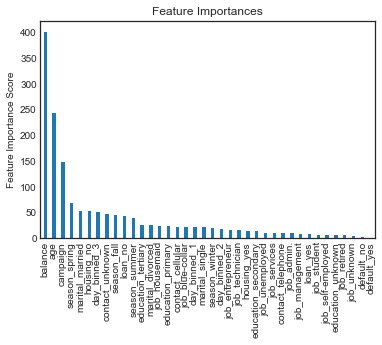

In [42]:
modelfit(xgb1, dtrain, features, feat_imp=True, smote=False)

    mean_test_recall  mean_test_roc_auc  mean_test_precision  \
0           0.723948           0.713041             0.145984   
1           0.723485           0.713059             0.145790   
2           0.723485           0.713062             0.145790   
3           0.724874           0.713305             0.145891   
4           0.724874           0.713293             0.145876   
5           0.694769           0.720633             0.157353   
6           0.693842           0.720216             0.157269   
7           0.694768           0.720651             0.157183   
8           0.694307           0.720225             0.157254   
9           0.692454           0.720412             0.156917   
10          0.671147           0.722650             0.163414   
11          0.672075           0.722923             0.163819   
12          0.669297           0.722688             0.162835   
13          0.669757           0.722904             0.163159   
14          0.671148           0.722946 

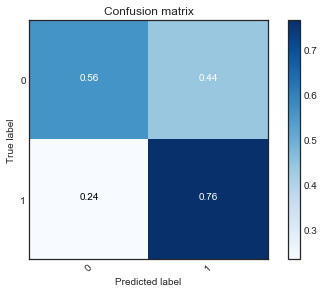

In [43]:
# Step 2: Tune max_depth, min_child_weight, scale_pos_weight
# Tune these first as they will have the highest impact on model outcome. 
# Start with wider ranges and later perform an iteration for smaller ranges.

# first iteration:({'max_depth': 5, 'min_child_weight': 5}, 0.7326219722528446)

# Search for optimum values one above and below
param_test1 = {
 'max_depth': [2, 3, 4],
 'min_child_weight': [2, 3, 4, 5, 6]
}

gsearch1 = GridSearchCV(xgb.XGBClassifier( 
                        booster= 'gbtree',
                        learning_rate =0.05, 
                        n_estimators= 61, # n_estimators from previous step
                        max_depth=5,
                        min_child_weight=1, 
                        gamma=0, 
                        subsample=0.8, 
                        colsample_bytree=0.8,
                        objective= 'binary:logistic', 
                        scale_pos_weight=11, 
                        seed=27), 

            refit='recall', param_grid = param_test1, 
            scoring=['recall', 'roc_auc', 'precision'],
            n_jobs=-1, iid=False, cv=5, return_train_score=True)

gsearch1.fit(X_train, y_train)

gs_results(gsearch1, X_test, y_test)

   mean_test_recall  mean_test_roc_auc  mean_test_precision          params
0          0.708535           0.727063             0.156954  {'gamma': 0.0}
1          0.708535           0.727063             0.156954  {'gamma': 0.1}
2          0.708535           0.727063             0.156954  {'gamma': 0.2}
3          0.708535           0.727063             0.156954  {'gamma': 0.3}
4          0.708535           0.727063             0.156954  {'gamma': 0.4}
Normalized confusion matrix
[[0.62087605 0.37912395]
 [0.24817518 0.75182482]]
{'gamma': 0.0} 0.7085348302651233


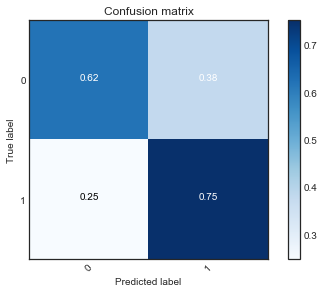

In [44]:
# Step 3: Tune gamma 

param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)],
 
}

gsearch2 = GridSearchCV(xgb.XGBClassifier( 
                        booster= 'gbtree',
                        learning_rate =0.05, 
                        n_estimators=61, 
                        max_depth=3,
                        min_child_weight=2, 
                        gamma=0, 
                        subsample=0.8, 
                        colsample_bytree=0.8,
                        objective= 'binary:logistic', 
                        scale_pos_weight=11, 
                        seed=27), 

            refit='recall', param_grid = param_test2, 
            scoring=['recall', 'roc_auc', 'precision'],
            n_jobs=-1, iid=False, cv=5, return_train_score=True)

gsearch2.fit(dtrain[features], dtrain['y'])

gs_results(gsearch2, X_test, y_test)


In [45]:
# Recalibrate Number of Boosting rounds for updated parameters

xgb2 = xgb.XGBClassifier(
 booster= 'gbtree',
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 seed=27)

modelfit(xgb2, dtrain, features, feat_imp=False)

Length train: 26606
Length valid: 2957

Starting cv:
--------------------------------------------------------------------
[0]	train-auc:0.677271+0.00867931	test-auc:0.666726+0.00565355
[20]	train-auc:0.731829+0.0026859	test-auc:0.722701+0.00956311
[40]	train-auc:0.737847+0.0023363	test-auc:0.726581+0.0103232
[60]	train-auc:0.74349+0.00224034	test-auc:0.728507+0.01074
[80]	train-auc:0.74794+0.00232935	test-auc:0.729257+0.010562
[100]	train-auc:0.752026+0.00228767	test-auc:0.730176+0.00986459
[120]	train-auc:0.756011+0.00201496	test-auc:0.730604+0.00951175
[140]	train-auc:0.759764+0.00168874	test-auc:0.730129+0.0094195
[160]	train-auc:0.763125+0.00152812	test-auc:0.729977+0.00909119
n_estimators: 115
 
Fitting Classifier:
--------------------------------------------------------------------

Model Report
Precision (Train) : 0.168
Precision (Valid) : 0.1594
AUC Score (Train): 0.750775
AUC Score (Valid): 0.725763
Recall (Train) : 0.7139
Recall (Valid) : 0.7011


    mean_test_recall  mean_test_roc_auc  mean_test_precision  \
0           0.713338           0.726418             0.156565   
1           0.711492           0.727112             0.156400   
2           0.715926           0.727330             0.155790   
3           0.720726           0.727305             0.155278   
4           0.710749           0.726913             0.158030   
5           0.712233           0.727720             0.157635   
6           0.711491           0.727491             0.157303   
7           0.718142           0.727838             0.157338   
8           0.705952           0.727482             0.156817   
9           0.705213           0.726856             0.156638   
10          0.708535           0.727063             0.156954   
11          0.712964           0.727366             0.156507   
12          0.708540           0.727287             0.156712   
13          0.706688           0.727472             0.157248   
14          0.710016           0.727751 

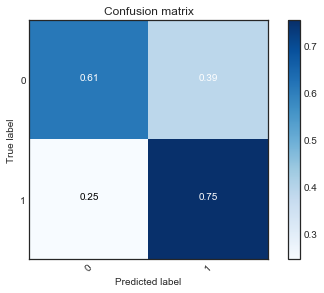

In [46]:
# Step 4: Tune subsample and col_sample_bytree

param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(xgb.XGBClassifier( 
                        booster= 'gbtree',
                        learning_rate =0.05, 
                        n_estimators=61, 
                        max_depth=3,
                        min_child_weight=2, 
                        gamma=0, 
                        subsample=0.8, 
                        colsample_bytree=0.8,
                        objective= 'binary:logistic', 
                        scale_pos_weight=11, 
                        seed=27), 

            refit='recall', param_grid = param_test3, 
            scoring=['recall', 'roc_auc', 'precision'],
            n_jobs=-1, iid=False, cv=5, return_train_score=True)

gsearch3.fit(dtrain[features], dtrain['y'])

gs_results(gsearch3, X_test, y_test)

    mean_test_recall  mean_test_roc_auc  mean_test_precision  \
0           0.708902           0.726813             0.155741   
1           0.712597           0.727093             0.156784   
2           0.713338           0.726418             0.156565   
3           0.710013           0.727091             0.155081   
4           0.704101           0.727011             0.156047   
5           0.704841           0.726388             0.156106   
6           0.710383           0.727339             0.157374   
7           0.711861           0.727564             0.157083   
8           0.702625           0.726950             0.156225   
9           0.705206           0.726059             0.156513   
10          0.710749           0.726913             0.158030   
11          0.707798           0.726712             0.156750   
12          0.704099           0.726088             0.156414   
13          0.702992           0.726302             0.157525   
14          0.709643           0.727378 

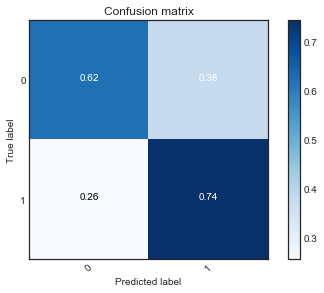

In [47]:
# Even though recall was highest for colsample = 0.6 and subsample = 0.9
# Values were chosen for better balance between recall and precision
# Fine tune intervals for col_sample and sub_sample

param_test4 = {
 'subsample':[i/100.0 for i in range(50,70,5)],
 'colsample_bytree':[i/100.0 for i in range(60,80,5)]
}

gsearch4 = GridSearchCV(xgb.XGBClassifier( 
                        booster= 'gbtree',
                        learning_rate =0.05, 
                        n_estimators=61, 
                        max_depth=3,
                        min_child_weight=2, 
                        gamma=0, 
                        subsample=0.8, 
                        colsample_bytree=0.8,
                        objective= 'binary:logistic', 
                        scale_pos_weight=11, 
                        seed=27), 

            refit='recall', param_grid = param_test4, 
            scoring=['recall', 'roc_auc', 'precision'],
            n_jobs=-1, iid=False, cv=5, return_train_score=True)

gsearch4.fit(dtrain[features], dtrain['y'])

gs_results(gsearch4, X_test, y_test)

   mean_test_recall  mean_test_roc_auc  mean_test_precision  \
0          0.708534           0.727153             0.157818   
1          0.705950           0.727139             0.157007   
2          0.707427           0.726885             0.157496   
3          0.707428           0.726706             0.157484   
4          0.706688           0.726824             0.157190   
5          0.706687           0.726957             0.157024   

               params  
0  {'reg_alpha': 0.5}  
1  {'reg_alpha': 1.0}  
2  {'reg_alpha': 1.5}  
3  {'reg_alpha': 2.0}  
4  {'reg_alpha': 2.5}  
5  {'reg_alpha': 3.0}  
Normalized confusion matrix
[[0.62423113 0.37576887]
 [0.26094891 0.73905109]]
{'reg_alpha': 0.5} 0.15781793594018909


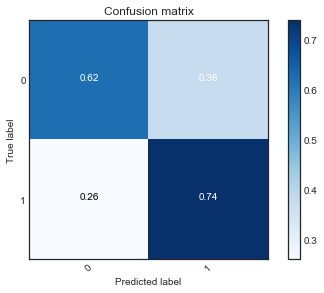

In [48]:
# Tune Regularization Parameters
# Look to optimize precision to try and balance recall

param_test5 = {
 'reg_alpha': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
}

gsearch5 = GridSearchCV(xgb.XGBClassifier( 
                        booster= 'gbtree',
                        learning_rate =0.05, 
                        n_estimators=61, 
                        max_depth=3,
                        min_child_weight=2, 
                        gamma=0, 
                        subsample=0.6, 
                        colsample_bytree=0.75,
                        objective= 'binary:logistic', 
                        scale_pos_weight=11, 
                        seed=27), 

            refit='precision', param_grid = param_test5, 
            scoring=['recall', 'roc_auc', 'precision'],
            n_jobs=-1, iid=False, cv=5, return_train_score=True)

gsearch5.fit(dtrain[features], dtrain['y'])

gs_results(gsearch5, X_test, y_test)

Length train: 26606
Length valid: 2957

Starting cv:
--------------------------------------------------------------------
[0]	train-auc:0.66981+0.0049349	test-auc:0.663434+0.0138656
[20]	train-auc:0.723207+0.00221219	test-auc:0.714049+0.0125357
[40]	train-auc:0.728495+0.00124946	test-auc:0.718915+0.0104629
[60]	train-auc:0.73048+0.00149753	test-auc:0.720537+0.0103845
[80]	train-auc:0.73192+0.00119358	test-auc:0.721677+0.0106964
[100]	train-auc:0.733159+0.00161066	test-auc:0.722895+0.01052
[120]	train-auc:0.734498+0.0019238	test-auc:0.724281+0.0106305
[140]	train-auc:0.735635+0.00221399	test-auc:0.725167+0.0106231
[160]	train-auc:0.736577+0.00227113	test-auc:0.725899+0.0108515
[180]	train-auc:0.737656+0.00215269	test-auc:0.72659+0.0111289
[200]	train-auc:0.738799+0.00233181	test-auc:0.727212+0.0110848
[220]	train-auc:0.739847+0.00227048	test-auc:0.727626+0.0110695
[240]	train-auc:0.740705+0.00217777	test-auc:0.727822+0.0110732
[260]	train-auc:0.741657+0.00212752	test-auc:0.728062+0.0109

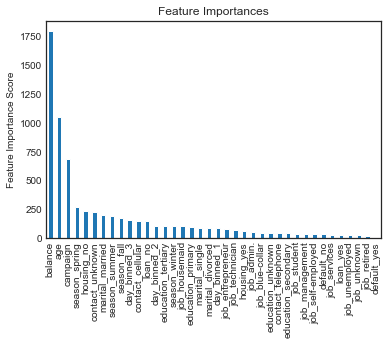

In [49]:
# Recalibrate Number of Boosting rounds for updated parameters

xgb3 = xgb.XGBClassifier(
 reg_alpha=0.5,
 booster= 'gbtree',
 learning_rate =0.01,
 n_estimators=1500,
 max_depth=3,
 min_child_weight=2,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 seed=27)

modelfit(xgb3, dtrain, features, feat_imp=True)


Model Report
Precision (Test) : 0.1421
Precision (Train) : 0.1482
AUC Score (Test): 0.711795
AUC Score (Train): 0.732834
Recall (Test) : 0.7297
Recall (Train) : 0.7599


Text(0, 0.5, 'Feature Importance Score')

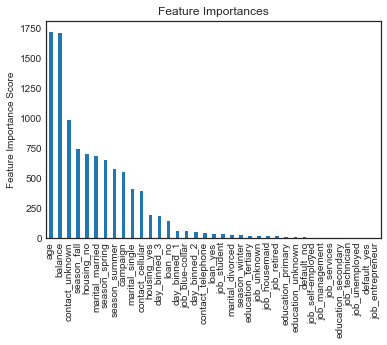

In [50]:
# Final model run on test set

xgb4 = xgb.XGBClassifier(
 reg_alpha=0.5,
 booster= 'gbtree',
 learning_rate =0.001,
 n_estimators=1500,
 max_depth=3,
 min_child_weight=2,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 seed=27)

xgb4.fit(dtrain[features], dtrain['y'], eval_metric='auc', verbose=False)

# Predict training set:
train_predictions = xgb4.predict(dtrain[features])
train_predprob = xgb4.predict_proba(dtrain[features])[:,1]

# Predict test set:
test_predictions = xgb4.predict(dtest[features])
test_predprob = xgb4.predict_proba(dtest[features])[:,1]

# Print model report:
print("\nModel Report")
print("Precision (Test) : %.4g" % metrics.precision_score(dtest['y'], test_predictions))
print("Precision (Train) : %.4g" % metrics.precision_score(dtrain['y'], train_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['y'], test_predprob))
print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], train_predprob))
print("Recall (Test) : %.4g" % metrics.recall_score(dtest['y'], test_predictions))
print("Recall (Train) : %.4g" % metrics.recall_score(dtrain['y'], train_predictions))

# Feature Importance
feat_imp = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

Normalized confusion matrix
[[0.5557045  0.4442955 ]
 [0.27031019 0.72968981]]
True Negative Rate: 0.5557


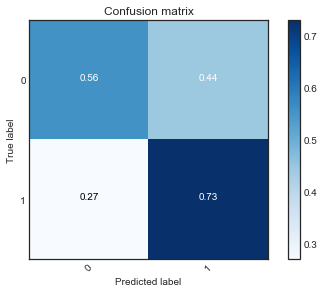

In [51]:
cnf_matrix = confusion_matrix(dtest['y'], test_predictions)
vs.plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True);

tnr = 3731/(3731+2983)
print("True Negative Rate: %.4g" % tnr)

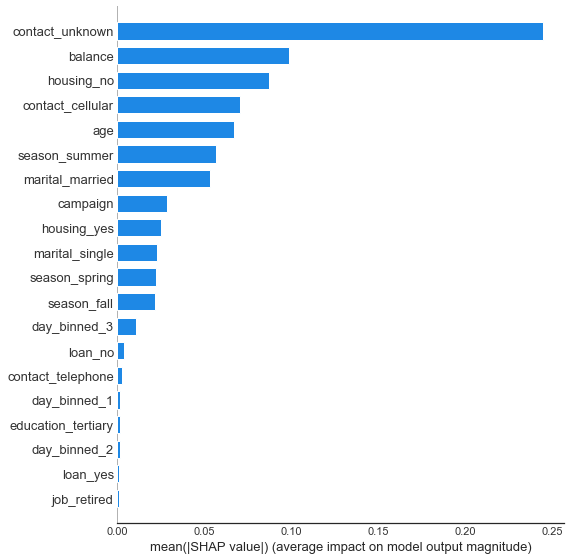

In [52]:
# Get shapley values for features

fig = plt.figure()
explainer = shap.TreeExplainer(xgb4)
shap_values = explainer.shap_values(dtrain[features])

shap.summary_plot(shap_values, dtrain[features], plot_type="bar")
fig.savefig('shapley_features_full.png')

In [53]:
# Rerun model with only important features

features_keep = ['contact_unknown', 'housing_no','age', 'balance', 'campaign',
                 'season_summer','marital_married','contact_cellular', 'season_spring',
                 'season_fall','housing_yes','day_binned_3', 'loan_no', 'marital_single']



Model Report
Precision (Test) : 0.1421
Precision (Train) : 0.1482
AUC Score (Test): 0.711520
AUC Score (Train): 0.732355
Recall (Test) : 0.7312
Recall (Train) : 0.7595


Text(0, 0.5, 'Feature Importance Score')

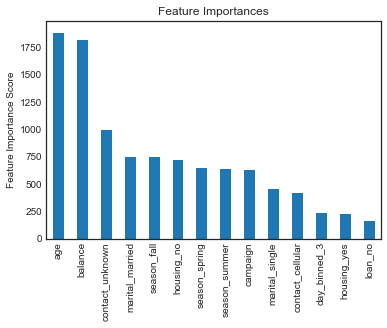

In [54]:
# Feature reduction does not lead to 
# a loss in any metric, and slightly improves all

xgb4 = xgb.XGBClassifier(
 reg_alpha=0.5,
 booster= 'gbtree',
 learning_rate =0.001,
 n_estimators=1500,
 max_depth=3,
 min_child_weight=2,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 seed=27)

xgb4.fit(dtrain[features_keep], dtrain['y'], eval_metric='auc', verbose=False)

# Predict training set:
train_predictions = xgb4.predict(dtrain[features_keep])
train_predprob = xgb4.predict_proba(dtrain[features_keep])[:,1]

# Predict test set:
test_predictions = xgb4.predict(dtest[features_keep])
test_predprob = xgb4.predict_proba(dtest[features_keep])[:,1]

# Print model report:
print("\nModel Report")
print("Precision (Test) : %.4g" % metrics.precision_score(dtest['y'], test_predictions))
print("Precision (Train) : %.4g" % metrics.precision_score(dtrain['y'], train_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['y'], test_predprob))
print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], train_predprob))
print("Recall (Test) : %.4g" % metrics.recall_score(dtest['y'], test_predictions))
print("Recall (Train) : %.4g" % metrics.recall_score(dtrain['y'], train_predictions))

# Feature Importance
feat_imp = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Trade-offs between specificity and sensitivity


Model Report
Precision (Test) : 0.152
Precision (Train) : 0.1595
AUC Score (Test): 0.717114
AUC Score (Train): 0.742511
Recall (Test) : 0.7031
Recall (Train) : 0.734
Normalized confusion matrix
[[0.60455764 0.39544236]
 [0.29689808 0.70310192]]


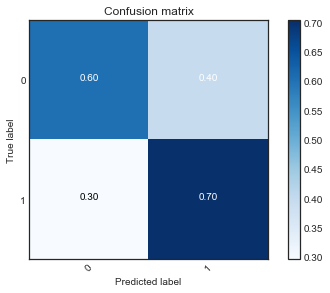

In [55]:
# Model 1 - relatively less recall

xgb4 = xgb.XGBClassifier(
 reg_alpha=1.0,
 booster= 'gbtree',
 learning_rate =0.001,
 n_estimators=1500,
 max_depth=4,
 min_child_weight=4,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 seed=27)

xgb4.fit(dtrain[features_keep], dtrain['y'], eval_metric='auc', verbose=False)

# Predict training set:
train_predictions = xgb4.predict(dtrain[features_keep])
train_predprob = xgb4.predict_proba(dtrain[features_keep])[:,1]

# Predict test set:
test_predictions = xgb4.predict(dtest[features_keep])
test_predprob = xgb4.predict_proba(dtest[features_keep])[:,1]

# Print model report:
print("\nModel Report")
print("Precision (Test) : %.4g" % metrics.precision_score(dtest['y'], test_predictions))
print("Precision (Train) : %.4g" % metrics.precision_score(dtrain['y'], train_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['y'], test_predprob))
print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], train_predprob))
print("Recall (Test) : %.4g" % metrics.recall_score(dtest['y'], test_predictions))
print("Recall (Train) : %.4g" % metrics.recall_score(dtrain['y'], train_predictions))

cnf_matrix = confusion_matrix(dtest['y'], test_predictions)
vs.plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True)

Text(0, 0.5, 'Feature Importance Score')

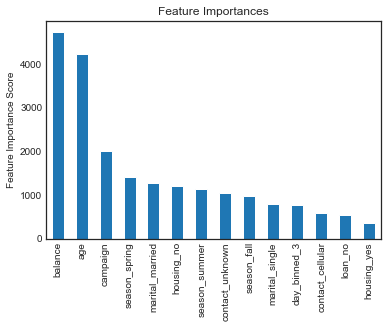

In [56]:
feat_imp = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [57]:
#_62.to_csv('plesant.csv')


Model Report
Precision (Test) : 0.1375
Precision (Train) : 0.139
AUC Score (Test): 0.709894
AUC Score (Train): 0.729504
Recall (Test) : 0.7843
Recall (Train) : 0.7939
Normalized confusion matrix
[[0.50402145 0.49597855]
 [0.21565731 0.78434269]]


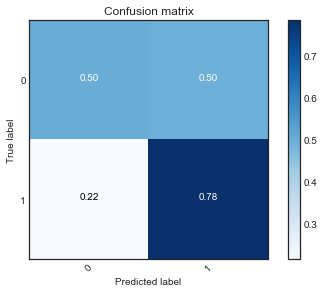

In [58]:
# Model 2 - moderate recall
# Also note that this performance matches the 
# class balanced Logistic Regression run previously

xgb5 = xgb.XGBClassifier(
 reg_alpha=2.0,
 booster= 'gbtree',
 learning_rate =0.001,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=4,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.85,
 objective= 'binary:logistic',
 scale_pos_weight=11,
 seed=27)

xgb5.fit(dtrain[features_keep], dtrain['y'], eval_metric='auc', verbose=False)

# Predict training set:
train_predictions = xgb5.predict(dtrain[features_keep])
train_predprob = xgb5.predict_proba(dtrain[features_keep])[:,1]

# Predict test set:
test_predictions = xgb5.predict(dtest[features_keep])
test_predprob = xgb5.predict_proba(dtest[features_keep])[:,1]

# Print model report:
print("\nModel Report")
print("Precision (Test) : %.4g" % metrics.precision_score(dtest['y'], test_predictions))
print("Precision (Train) : %.4g" % metrics.precision_score(dtrain['y'], train_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['y'], test_predprob))
print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], train_predprob))
print("Recall (Test) : %.4g" % metrics.recall_score(dtest['y'], test_predictions))
print("Recall (Train) : %.4g" % metrics.recall_score(dtrain['y'], train_predictions))

cm = confusion_matrix(dtest['y'], test_predictions)

vs.plot_confusion_matrix(cm, classes=[0,1], normalize=True)

Text(0, 0.5, 'Feature Importance Score')

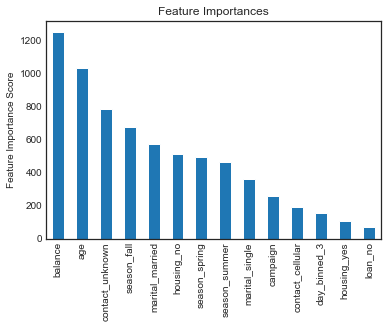

In [59]:
feat_imp = pd.Series(xgb5.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


Model Report
Precision (Test) : 0.1175
Precision (Train) : 0.1192
AUC Score (Test): 0.717400
AUC Score (Train): 0.742568
Recall (Test) : 0.8818
Recall (Train) : 0.8992
Normalized confusion matrix
[[0.33199285 0.66800715]
 [0.11816839 0.88183161]]


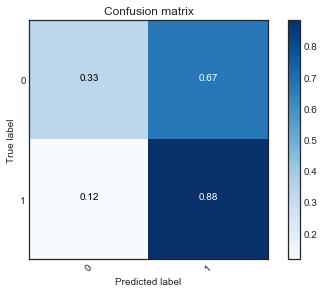

In [60]:
# Model 3 high recall 

xgb6 = xgb.XGBClassifier(
 reg_alpha=2.5,
 booster= 'gbtree',
 learning_rate =0.001,
 n_estimators=1500,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 scale_pos_weight=19,
 seed=27)

xgb6.fit(dtrain[features_keep], dtrain['y'], eval_metric='auc', verbose=False)

# Predict training set:
train_predictions = xgb6.predict(dtrain[features_keep])
train_predprob = xgb6.predict_proba(dtrain[features_keep])[:,1]

# Predict test set:
test_predictions = xgb6.predict(dtest[features_keep])
test_predprob = xgb6.predict_proba(dtest[features_keep])[:,1]

# Print model report:
print("\nModel Report")
print("Precision (Test) : %.4g" % metrics.precision_score(dtest['y'], test_predictions))
print("Precision (Train) : %.4g" % metrics.precision_score(dtrain['y'], train_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['y'], test_predprob))
print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], train_predprob))
print("Recall (Test) : %.4g" % metrics.recall_score(dtest['y'], test_predictions))
print("Recall (Train) : %.4g" % metrics.recall_score(dtrain['y'], train_predictions))

cm = confusion_matrix(dtest['y'], test_predictions)

vs.plot_confusion_matrix(cm, classes=[0,1], normalize=True)

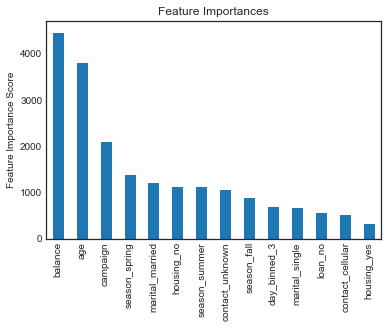

In [61]:
feat_imp = pd.Series(xgb6.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score');

# References



- Pipeline for resampling: https://github.com/jeremyjordan/imbalanced-data/blob/master/Learning%20from%20imbalanced%20data.ipynb

- Balanced Random Forest: https://stackoverflow.com/questions/40565444/balanced-random-forest-in-scikit-learn-python

- GridSearchCV with SMOTE upsampling: https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn

**_Tuning_**
- Roc vs Precision-Recall Curves: https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves

- xbgClassifier evals: https://stats.stackexchange.com/questions/207359/eval-set-on-xgbclassifier

- Crossval Score on multiple metrics: https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score

- tuning refit with multiple scoring metrics: https://stackoverflow.com/questions/52539986/scoring-in-gridsearch-cv

**_weights_**
- class weights: https://stats.stackexchange.com/questions/244630/difference-between-sample-weight-and-class-weight-randomforest-classifier

- weights XGBoost: https://datascience.stackexchange.com/questions/38823/handling-unbalanced-datasets-with-xg-boosting/38826
https://stackoverflow.com/questions/48079973/xgboost-sample-weights-vs-scale-pos-weight

- dict weights: https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

**_Evaluating Model_**

- precision-recall: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

- cross validation: https://stackoverflow.com/questions/39984982/how-to-find-the-regularization-parameter-in-logistic-regression-in-python-scikit


#### TO DO:
- Feature Engineering (time since being contacted)? Can use economic/social variables? 
- evaluate classifier by ranking metric
- adjust decision threshold, roc curve
- cost- benefit analysis & churn
- radar plots + visuals for marketing segmentation (target markets)